In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gan = np.load('../../experiments/runs/NLO_run_Feb262020_rayBest/train_mse.npy')
l2 = np.load('../../experiments/runs/NLO_run_Feb262020_L2Compare/train_mse.npy')
l1 = np.load('../../experiments/runs/NLO_run_Feb262020_L1Compare/train_mse.npy')
huber = np.load('../../experiments/runs/NLO_run_Feb262020_SmoothL1Compare/train_mse.npy')

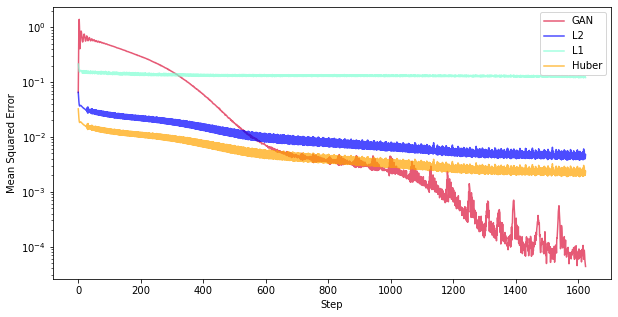

In [4]:
steps = np.arange(len(gan))
a = 0.7
plt.figure(figsize=(10,5))
plt.plot(steps, gan, label='GAN', color='crimson', alpha=a)
plt.plot(steps, l2, label='L2', color='blue', alpha=a)
plt.plot(steps, l1, label='L1', color='aquamarine', alpha=a)
plt.plot(steps, huber, label='Huber', color='orange', alpha=a)
plt.legend()
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error');

In [21]:
gan_reps = np.load('../../denn/nlo_rand_reps.npy')[:, :1200]
l2_reps = np.load('../../denn/nlo_rand_reps_L2.npy')[:, :1200]
l1_reps = np.load('../../denn/nlo_rand_reps_L1.npy')[:, :1200]
huber_reps = np.load('../../denn/nlo_rand_reps_smoothL1.npy')[:, :1200]

In [3]:
import denn.utils

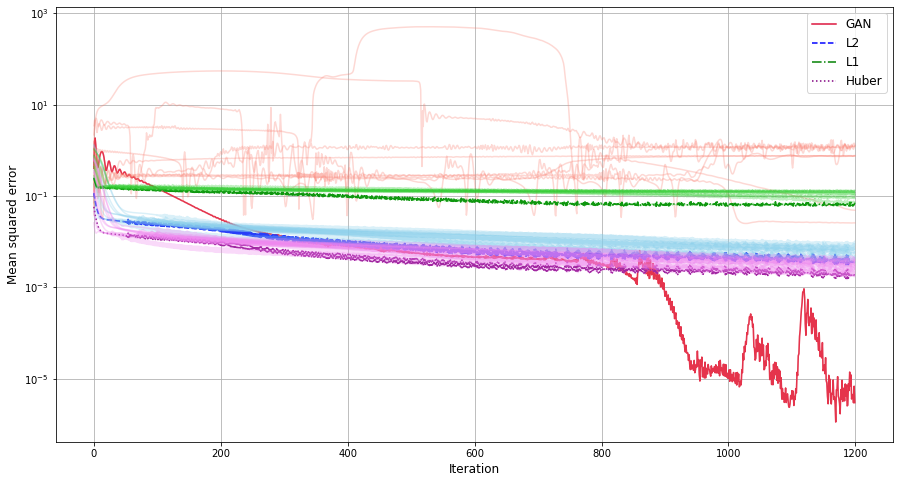

In [26]:
plt.figure(figsize=(15,8))
plt.yscale('log')

steps = np.arange(gan_reps.shape[1])

a=0.3

# gan
plt.plot(steps, gan_reps[np.argmin(gan_reps[:,-1]),:], 
         color='crimson', label='GAN', linestyle='solid')
for i in range(gan_reps.shape[0]):
    plt.plot(steps, gan_reps[i,:], alpha=a, color='salmon')
    
# L2
plt.plot(steps, l2_reps[np.argmin(l2_reps[:,-1]),:], 
         color='blue', label='L2', linestyle='dashed')
for i in range(l2_reps.shape[0]):
    plt.plot(steps, l2_reps[i, :], alpha=a, color='skyblue')
    
# L1
plt.plot(steps, l1_reps[np.argmin(l1_reps[:,-1]),:], 
         color='green', label='L1', linestyle='dashdot')
for i in range(l1_reps.shape[0]):
    plt.plot(steps, l1_reps[i, :], alpha=a, color='limegreen')
    
# Huber
plt.plot(steps, huber_reps[np.argmin(huber_reps[:,-1]),:], 
         color='purple', label='Huber', linestyle='dotted')
for i in range(huber_reps.shape[0]):
    plt.plot(steps, huber_reps[i, :], alpha=a, color='violet')


plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Mean squared error')
plt.grid()
plt.savefig('nlo_rand_reps.jpg');

# Keeping Model Randomness Fixed, Varying Data

In [12]:
gan_reps = np.load('../../experiments/reps/nlo_gan_rand_reps_fixedmodels2.npy') # 2 uses n=1000 instead of n=8000
l2_reps = np.load('../../experiments/reps/nlo_l2_rand_reps_fixedmodels.npy')
l1_reps = np.load('../../experiments/reps/nlo_l1_rand_reps_fixedmodels.npy')
huber_reps = np.load('../../experiments/reps/nlo_huber_rand_reps_fixedmodels.npy')

steps = np.arange(gan_reps.shape[1])

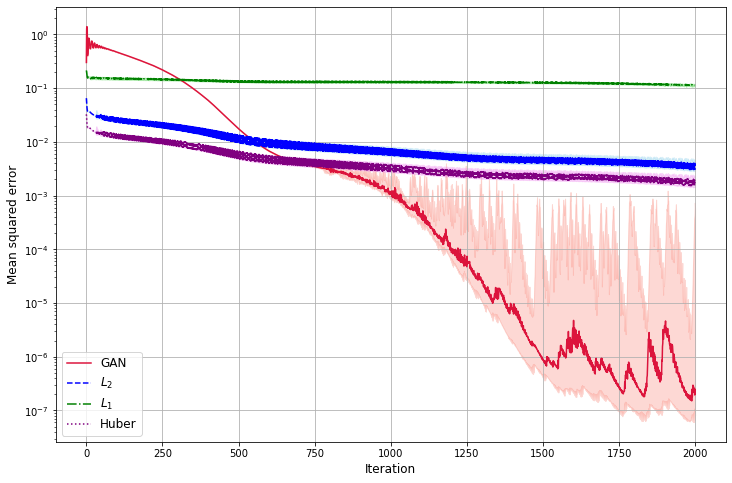

In [14]:
plt.figure(figsize=(12,8))
plt.yscale('log')

a=0.3
pctiles = (2.5, 97.5)

# gan
plt.plot(steps, np.median(gan_reps, axis=0), 
         color='crimson', label='GAN', linestyle='solid')
lqt, upt = np.percentile(gan_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='salmon', alpha=a)
# for i in range(gan_reps.shape[0]):
#     plt.plot(steps, gan_reps[i,:], alpha=a, color='salmon')
    
# L2
plt.plot(steps, np.median(l2_reps, axis=0), 
         color='blue', label='$L_2$', linestyle='dashed')
lqt, upt = np.percentile(l2_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='skyblue', alpha=a)
# for i in range(l2_reps.shape[0]):
#     plt.plot(steps, l2_reps[i, :], alpha=a, color='skyblue')
    
# L1
plt.plot(steps, np.median(l1_reps, axis=0), 
         color='green', label='$L_1$', linestyle='dashdot')
lqt, upt = np.percentile(l1_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='limegreen', alpha=a)
# for i in range(l1_reps.shape[0]):
#     plt.plot(steps, l1_reps[i, :], alpha=a, color='limegreen')
    
# Huber
plt.plot(steps, np.median(huber_reps, axis=0), 
         color='purple', label='Huber', linestyle='dotted')
lqt, upt = np.percentile(huber_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='violet', alpha=a)
# for i in range(huber_reps.shape[0]):
#     plt.plot(steps, huber_reps[i, :], alpha=a, color='violet')


plt.legend(loc='lower left')
plt.xlabel('Iteration')
plt.ylabel('Mean squared error')
plt.grid()
plt.savefig('nlo_rand_reps.jpg');

# Some hypers

In [27]:
from ray.tune import Analysis

In [28]:
an = Analysis('/Users/dylanrandle/ray_results/gan_tuning_nlo/')

In [33]:
an.dataframe('mean_squared_error', mode='min').sort_values(by='mean_squared_error').head(10)

,mean_squared_error,trial_id,training_iteration,time_this_iter_s,done,timesteps_total,episodes_total,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config/discriminator,config/generator,config/problem,config/training,logdir
1135,0.000022,84731498,0,673.564385,False,NaN,NaN,c370db253ace40fc96ec42e4a8893fb2,2020-03-06_17-53-09,1583535189,673.564385,53761,Dylans-MacBook-Pro.local,192.168.1.7,673.564385,0,1,"117_n_hidden_layers=4,n_hidden_units=37,n_hidd...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 100, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/gan_tuning_nlo/...
937,0.000028,84cf34e4,0,297.224581,False,NaN,NaN,a7b1c8792d54409d9c924abc95acbeb7,2020-03-06_19-26-21,1583540781,297.224581,58190,Dylans-MacBook-Pro.local,192.168.1.7,297.224581,0,1,"265_n_hidden_layers=3,n_hidden_units=20,n_hidd...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 100, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/gan_tuning_nlo/...
425,0.000064,b03ddafa,0,246.511737,False,NaN,NaN,478ba5f37ed1408b9977b3205fb336ab,2020-03-06_15-53-58,1583528038,246.511737,49417,Dylans-MacBook-Pro.local,192.168.1.7,246.511737,0,1,"85_n_hidden_layers=4,n_hidden_units=36,n_hidde...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 100, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/gan_tuning_nlo/...
1306,0.000065,fd282e38,0,174.914195,False,NaN,NaN,cb9ce5b345744edd8de8616c5138d2ec,2020-02-26_11-58-22,1582736302,174.914195,97442,dhcp-10-250-76-159.harvard.edu,10.250.76.159,174.914195,0,1,"59_d_lr=2.4036e-05,g_lr=0.017528","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 100, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/gan_tuning_nlo/...
458,0.000079,fd31f922,0,171.136535,False,NaN,NaN,e86d7764fa39410ebba502ca112472f3,2020-02-26_12-07-51,1582736871,171.136535,98508,dhcp-10-250-76-159.harvard.edu,10.250.76.159,171.136535,0,1,"85_d_lr=0.0034228,g_lr=0.0049843","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 100, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/gan_tuning_nlo/...
1360,0.000452,fd30780e,0,183.808580,False,NaN,NaN,c3bab6fade38438ea57431ae7f689f05,2020-02-26_12-04-52,1582736692,183.808580,97802,dhcp-10-250-76-159.harvard.edu,10.250.76.159,183.808580,0,1,"81_d_lr=0.0012783,g_lr=0.010991","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'dx_dt0': 0.5, 'n': 100, 'perturb': True, 't_...","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/gan_tuning_nlo/...
200,0.000945,c236d632,0,374.629453,False,NaN,NaN,0eef093e63364e8289bf80e1921103e9,2020-02-26_10-17-11,1582730231,374.629453,93879,Dylans-MacBook-Pro.local,192.168.1.7,374.629453,0,1,"69_d_lr=0.0009065,g_lr=0.0083145","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden_...","{'n': 100, 'perturb': True, 't_max': 12.56}","{'D_iters': 1, 'G_iters': 1, 'conditional': Fa...",/Users/dylanrandle/ray_results/gan_tuning_nlo/...
1161,0.001797,b002f12e,0,254.389596,False,NaN,NaN,c013823454734c248b4e81e9bb31abed,2020-03-06_15-16-02,1583525762,254.389596,46972,Dylans-MacBook-Pro.local,192.168.1.7,254.389596,0,1,"11_n_hidden_layers=3,n_hidden_units=33,n_hidde...","{'activation': 'Tanh', 'in_dim': 1, 'n_hidden

In [30]:
an.get_best_config('mean_squared_error', mode='min')

{'discriminator': {'activation': 'Tanh',
  'in_dim': 1,
  'n_hidden_layers': 4,
  'n_hidden_units': 37,
  'out_dim': 1,
  'regress': False,
  'residual': True,
  'spectral_norm': True},
 'generator': {'activation': 'Tanh',
  'in_dim': 1,
  'n_hidden_layers': 4,
  'n_hidden_units': 48,
  'out_dim': 1,
  'regress': True,
  'residual': True},
 'problem': {'dx_dt0': 0.5, 'n': 100, 'perturb': True, 't_max': 12.56},
 'training': {'D_iters': 1,
  'G_iters': 1,
  'conditional': False,
  'd1': 1,
  'd2': 1,
  'd_betas': [0.9, 0.999],
  'd_lr': 0.0005155201359737032,
  'dirname': 'NLO_run',
  'g_betas': [0.9, 0.999],
  'g_lr': 0.004469715484799873,
  'gamma': 0.999,
  'gp': 0.1,
  'log': False,
  'loss_fn': 'SmoothL1Loss',
  'lr_schedule': 'False',
  'method': 'unsupervised',
  'niters': 2226,
  'obs_every': 1,
  'plot': False,
  'save': False,
  'seed': 0,
  'wgan': False}}